In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("credit_rating.csv")
df=df.drop(['S.No','S.No.','Job'],axis=1)


In [3]:
df.columns
df.describe

<bound method NDFrame.describe of        CHK_ACCT  Duration         History Purpose of credit  Credit Amount  \
0           0DM         6        critical          radio-tv           1169   
1    less-200DM        48   duly-till-now          radio-tv           5951   
2    no-account        12        critical         education           2096   
3           0DM        42   duly-till-now         furniture           7882   
4           0DM        24           delay           new-car           4870   
..          ...       ...             ...               ...            ...   
995  no-account        12   duly-till-now         furniture           1736   
996         0DM        30   duly-till-now          used-car           3857   
997  no-account        12   duly-till-now          radio-tv            804   
998         0DM        45   duly-till-now          radio-tv           1845   
999  less-200DM        45        critical          used-car           4576   

    Balance in Savings A/C   

In [4]:
# df = df.drop(['Marital status', 'Install_rate','Age','Phone',], axis=1)
df.columns

Index(['CHK_ACCT', 'Duration', 'History', 'Purpose of credit', 'Credit Amount',
       'Balance in Savings A/C', 'Employment', 'Install_rate',
       'Marital status', 'Co-applicant', 'Present Resident', 'Real Estate',
       'Age', 'Other installment', 'Residence', 'Num_Credits',
       'No. dependents', 'Phone', 'Foreign', 'Credit classification'],
      dtype='object')

In [3]:
df['Credit classification'] = df['Credit classification'].map({' good.': 1, ' bad.': 0})

In [4]:
# categorical_columns = ['CHK_ACCT', 'History',"Purpose of credit", 'Balance in Savings A/C', 'Employment', 'Marital status', 'Co-applicant','Real Estate','Other installment','Residence','Job','Phone','Foreign']
categorical_columns = ['CHK_ACCT', 'History',"Purpose of credit", 'Balance in Savings A/C', 'Employment', 'Marital status', 'Co-applicant','Real Estate','Other installment','Residence','Phone','Foreign']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [7]:
df.columns

Index(['Duration', 'Credit Amount', 'Install_rate', 'Present Resident', 'Age',
       'Num_Credits', 'No. dependents', 'Credit classification',
       'CHK_ACCT_less-200DM', 'CHK_ACCT_no-account', 'CHK_ACCT_over-200DM',
       'History_ bank-paid-duly', 'History_ critical', 'History_ delay',
       'History_ duly-till-now', 'Purpose of credit_ domestic-app',
       'Purpose of credit_ education', 'Purpose of credit_ furniture',
       'Purpose of credit_ new-car', 'Purpose of credit_ others',
       'Purpose of credit_ radio-tv', 'Purpose of credit_ repairs',
       'Purpose of credit_ retraining', 'Purpose of credit_ used-car',
       'Balance in Savings A/C_ less100DM',
       'Balance in Savings A/C_ less500DM',
       'Balance in Savings A/C_ over1000DM', 'Balance in Savings A/C_ unknown',
       'Employment_ one-year', 'Employment_ over-seven',
       'Employment_ seven-years', 'Employment_ unemployed',
       'Marital status_ male-divorced', 'Marital status_ married-male',
      

In [8]:
corr=df.corr()

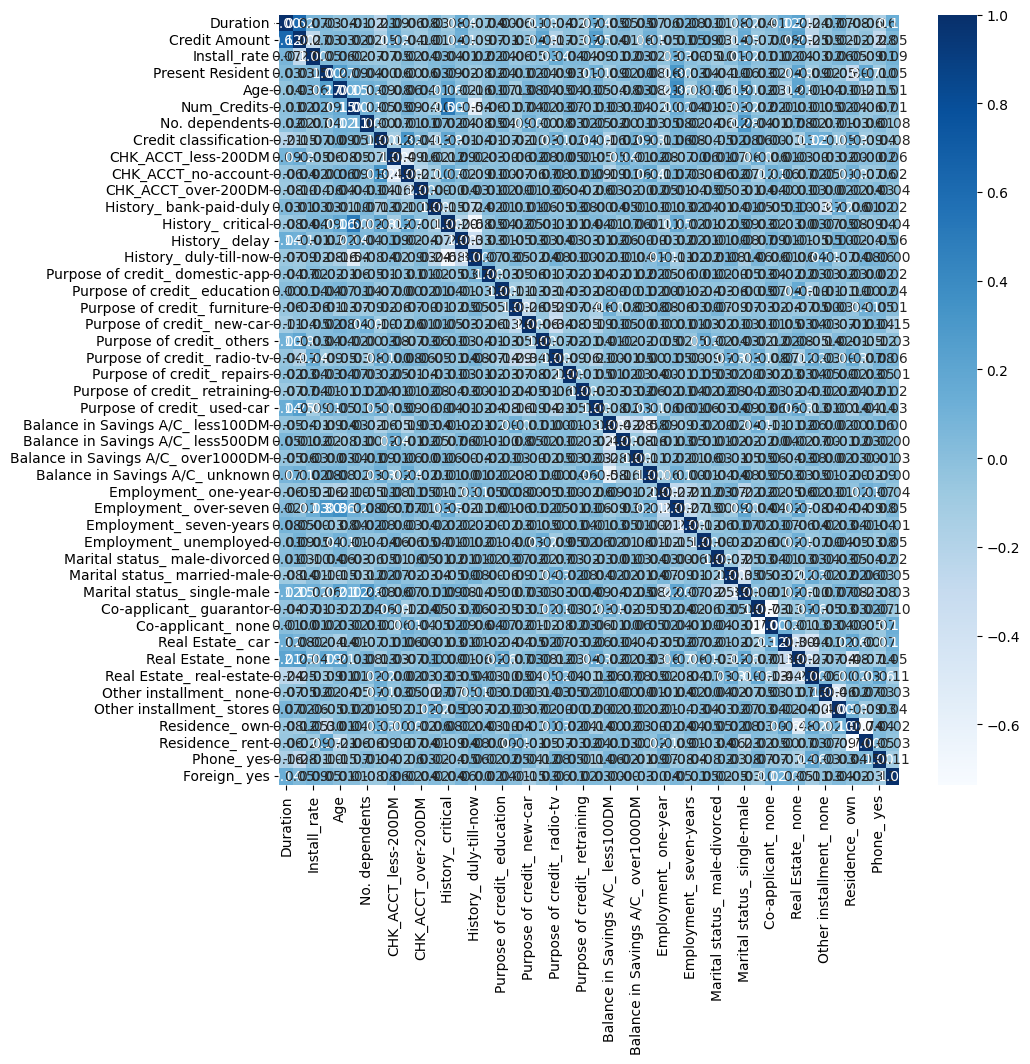

In [9]:
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

plt.show()

In [10]:
# cols_to_drop = corr.index[abs(corr['Output_Yes']) < 0.1]

df.columns
# df_filtered = df.drop(cols_to_drop, axis=1)

Index(['Duration', 'Credit Amount', 'Install_rate', 'Present Resident', 'Age',
       'Num_Credits', 'No. dependents', 'Credit classification',
       'CHK_ACCT_less-200DM', 'CHK_ACCT_no-account', 'CHK_ACCT_over-200DM',
       'History_ bank-paid-duly', 'History_ critical', 'History_ delay',
       'History_ duly-till-now', 'Purpose of credit_ domestic-app',
       'Purpose of credit_ education', 'Purpose of credit_ furniture',
       'Purpose of credit_ new-car', 'Purpose of credit_ others',
       'Purpose of credit_ radio-tv', 'Purpose of credit_ repairs',
       'Purpose of credit_ retraining', 'Purpose of credit_ used-car',
       'Balance in Savings A/C_ less100DM',
       'Balance in Savings A/C_ less500DM',
       'Balance in Savings A/C_ over1000DM', 'Balance in Savings A/C_ unknown',
       'Employment_ one-year', 'Employment_ over-seven',
       'Employment_ seven-years', 'Employment_ unemployed',
       'Marital status_ male-divorced', 'Marital status_ married-male',
      

In [7]:
# df_filtered.columns
df_filtered=df
# df_filtered=df = df.drop(['Present Resident','No. dependents','History_ delay','History_ duly-till-now','Purpose of credit_ domestic-app','Purpose of credit_ furniture','Purpose of credit_ others','Purpose of credit_ repairs','Purpose of credit_ retraining','Balance in Savings A/C_ less500DM','Marital status_ married-male','Co-applicant_ none','Real Estate_ car'], axis=1)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,pair_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [8]:
X = df_filtered.drop('Credit classification', axis=1)
y = df_filtered['Credit classification']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# X.shape

In [41]:
X.head()

,Duration,Credit Amount,Install_rate,Present Resident,Age,Num_Credits,No. dependents,CHK_ACCT_less-200DM,CHK_ACCT_no-account,CHK_ACCT_over-200DM,...,Co-applicant_ none,Real Estate_ car,Real Estate_ none,Real Estate_ real-estate,Other installment_ none,Other installment_ stores,Residence_ own,Residence_ rent,Phone_ yes,Foreign_ yes
0,6,1169,4,4,67,2,1,False,False,False,...,True,False,False,True,True,False,True,False,False,True
1,48,5951,2,2,22,1,1,True,False,False,...,True,False,False,True,True,False,True,False,True,True
2,12,2096,2,3,49,1,2,False,True,False,...,True,False,False,True,True,False,True,False,True,True
3,42,7882,2,4,45,1,2,False,False,False,...,False,False,False,False,True,False,False,False,True,True
4,24,4870,3,4,53,2,2,False,False,False,...,True,False,True,False,True,False,False,False,True,True


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale data
    ('poly_features', PolynomialFeatures(degree=2)),  # Generate polynomial and interaction features
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=69))
])

# Define a parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

              precision    recall  f1-score   support

           0       0.65      0.43      0.52        81
           1       0.77      0.89      0.82       169

    accuracy                           0.74       250
   macro avg       0.71      0.66      0.67       250
weighted avg       0.73      0.74      0.72       250

Best Parameters: {'svm__C': 1, 'svm__gamma': 'auto'}
Best Score: 0.7213333333333333


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly_features', PolynomialFeatures(degree=2)),  # Create polynomial features
    ('svm', SVC(class_weight='balanced', random_state=69))
])

# Define a comprehensive parameter grid
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'svm__gamma': [0.01, 0.1, 1, 10, 'scale', 'auto'],  # Kernel coefficient
    'svm__kernel': ['rbf', 'poly', 'sigmoid']  # Types of kernels
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy') #, verbose=10)
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

for degree in [1, 2, 3]:
    pipeline.set_params(poly_features__degree=degree)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Results for degree {degree}:")
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20        81
           1       0.69      0.94      0.80       169

    accuracy                           0.68       250
   macro avg       0.60      0.53      0.50       250
weighted avg       0.63      0.68      0.60       250

Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Results for degree 1:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60        81
           1       0.82      0.74      0.78       169

    accuracy                           0.72       250
   macro avg       0.69      0.70      0.69       250
weighted avg       0.73      0.72      0.72       250

Results for degree 2:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        81
           1       0.77      0.85      0.81       169

    accuracy                           0.73       250
   mac

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define a pipeline with more precise adjustments
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling is crucial for SVM
    ('poly_features', PolynomialFeatures(degree=1)),  # Using degree 1 as it performed best
    ('svm', SVC(class_weight='balanced', random_state=42))
])

# More fine-grained parameter grid
param_grid = {
    'svm__C': [0.5, 1, 2, 5,10,20,30,50],  # Explore around the best previously found C
    'svm__gamma': ['scale', 'auto', 0.01, 0.1],  # Narrow down the gamma range based on prior results
    'svm__kernel': ['rbf']  # Stick with the RBF kernel since it performed well
}

# Grid search with cross-validation, using StratifiedKFold for better distribution in classes
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)


              precision    recall  f1-score   support

           0       0.57      0.49      0.53        81
           1       0.77      0.82      0.80       169

    accuracy                           0.72       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.71      0.72      0.71       250

Best Parameters: {'svm__C': 5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [13]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(SVC(), param_grid, cv=5,verbose=-1)

# grid_search.fit(X, y)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# svc=grid_search.best_estimator_
svc_l=SVC(C=1,kernel='linear')
svc_r=SVC(C=1,kernel='rbf')
svc_p=SVC(C=0.1,kernel='poly')
svc_s=SVC(C=0.1,kernel='sigmoid')

In [14]:
param_grid = {
    'penalty': ['l1'],
    'C': [1],
    'solver': ['saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5) #,verbose=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

svc=grid_search.best_estimator_
# svc_l=SVC(C=1,kernel='linear')
# svc_r=SVC(C=1,kernel='rbf')
# svc_p=SVC(C=0.1,kernel='poly')
# svc_s=SVC(C=0.1,kernel='sigmoid')

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.708


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
svc_l.fit(X_train,y_train)
svc_r.fit(X_train,y_train)
svc_p.fit(X_train,y_train)
svc_s.fit(X_train,y_train)

SVC(C=0.1, kernel='sigmoid')

In [17]:
print(svc_l.score(X_test,y_test))
print(svc_r.score(X_test,y_test)) # Current Best
print(svc_p.score(X_test,y_test))
print(svc_s.score(X_test,y_test))

0.704
0.664
0.664
0.676


In [20]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) #,verbose=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

knn=grid_search.best_estimator_

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best score: 0.716


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

In [21]:
param_grid_dt = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search.best_params_)
print("Best score for Decision Tree:", grid_search.best_score_)

dcc=grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Decision Tree: {'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Decision Tree: 0.6866666666666668


In [22]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [500]
}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters for MLPC:", grid_search.best_params_)
print("Best score for MLPC:", grid_search.best_score_)

mlpc=grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for MLPC: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best score for MLPC: 0.72


In [43]:
# Optimised MLPC as per hyperparams finetuning

# mlpc=MLPClassifier(random_state=42,activation="tanh",alpha=0.0001,hidden_layer_sizes=(100,),learning_rate='constant',solver='sgd',max_iter=500)

In [23]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

grid_search = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters for Naive Bayes:", grid_search.best_params_)
print("Best score for Naive Bayes:", grid_search.best_score_)

gnb=grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Naive Bayes: {'var_smoothing': 1e-08}
Best score for Naive Bayes: 0.7466666666666667


In [24]:
svc_l.fit(X_train,y_train)
svc_p.fit(X_train,y_train)
svc_r.fit(X_train,y_train)
svc_s.fit(X_train,y_train)
gnb.fit(X_train,y_train)
knn.fit(X_train,y_train)
dcc.fit(X_train,y_train)
mlpc.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50),
              max_iter=500, random_state=42)

In [25]:
y_pred_svc_l=svc_l.predict(X_test)
y_pred_svc_r=svc_r.predict(X_test)
y_pred_svc_s=svc_s.predict(X_test)
y_pred_svc_p=svc_p.predict(X_test)
y_pred_gnb=gnb.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_dcc=dcc.predict(X_test)
y_pred_mlpc=mlpc.predict(X_test)

In [26]:
print("SVC_L:   ", svc_l.score(X_test,y_test))
print("SVC_R:   ", svc_r.score(X_test,y_test))
print("SVC_P:   ", svc_p.score(X_test,y_test))
print("SVC_S:   ", svc_s.score(X_test,y_test))
print("KNN:     ", knn.score(X_test,y_test))
print("DCC:     ", dcc.score(X_test,y_test))
print("MLPC:    ", mlpc.score(X_test,y_test))
print("GNB:     ", gnb.score(X_test,y_test))


SVC_L:    0.704
SVC_R:    0.664
SVC_P:    0.664
SVC_S:    0.676
KNN:      0.636
DCC:      0.672
MLPC:     0.68
GNB:      0.724


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

classifier_predictions = {
    'SVC_l': y_pred_svc_l,
    'SVC_r': y_pred_svc_r,
    'SVC_p': y_pred_svc_p,
    'SVC_s': y_pred_svc_s,
    'KNN': y_pred_knn,
    'Gaussian NB': y_pred_gnb,
    'Decision Tree': y_pred_dcc,
    'MLPC': y_pred_mlpc
}

y_true = y_test

results = {}
for name, predictions in classifier_predictions.items():
    report = classification_report(y_true, predictions, output_dict=True)
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score']
    }

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


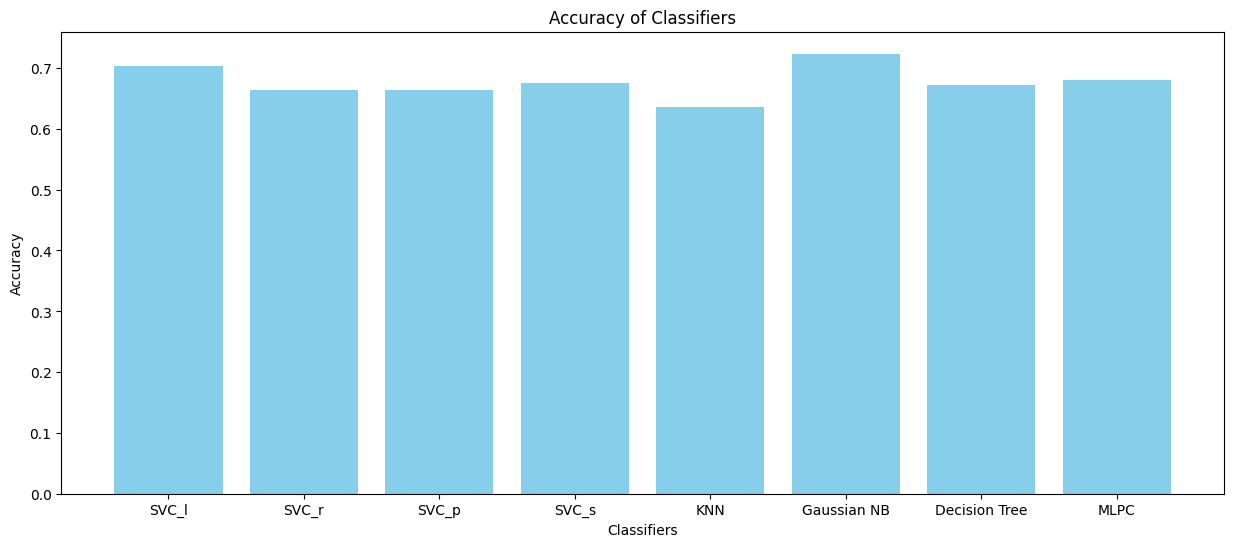

In [28]:
# Accuracy chart
metric = 'Accuracy'
classifiers = results.keys()
scores = [results[clf][metric] for clf in classifiers]

plt.figure(figsize=(15, 6))
plt.bar(classifiers, scores, color='skyblue') #['red', 'green', 'blue', 'orange', 'purple'])
plt.title(f'{metric} of Classifiers')
plt.ylabel(metric)
plt.xlabel('Classifiers')
plt.show()

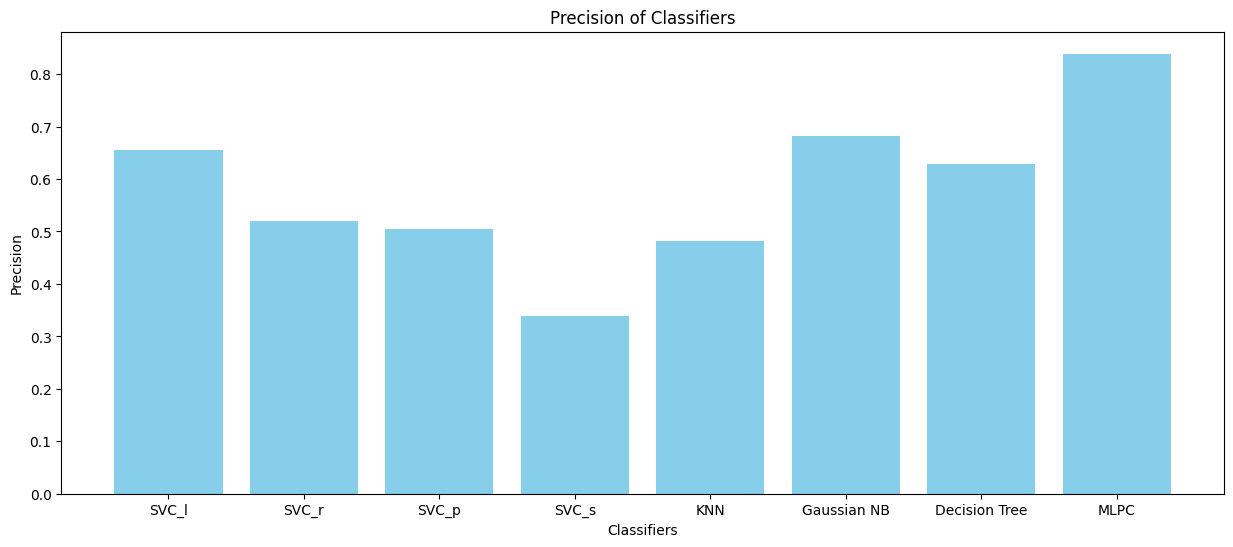

In [29]:
# Precision chart
metric = 'Precision'
classifiers = results.keys()
scores = [results[clf][metric] for clf in classifiers]

plt.figure(figsize=(15, 6))
plt.bar(classifiers, scores, color='skyblue') #['red', 'green', 'blue', 'orange', 'purple'])
plt.title(f'{metric} of Classifiers')
plt.ylabel(metric)
plt.xlabel('Classifiers')
plt.show()


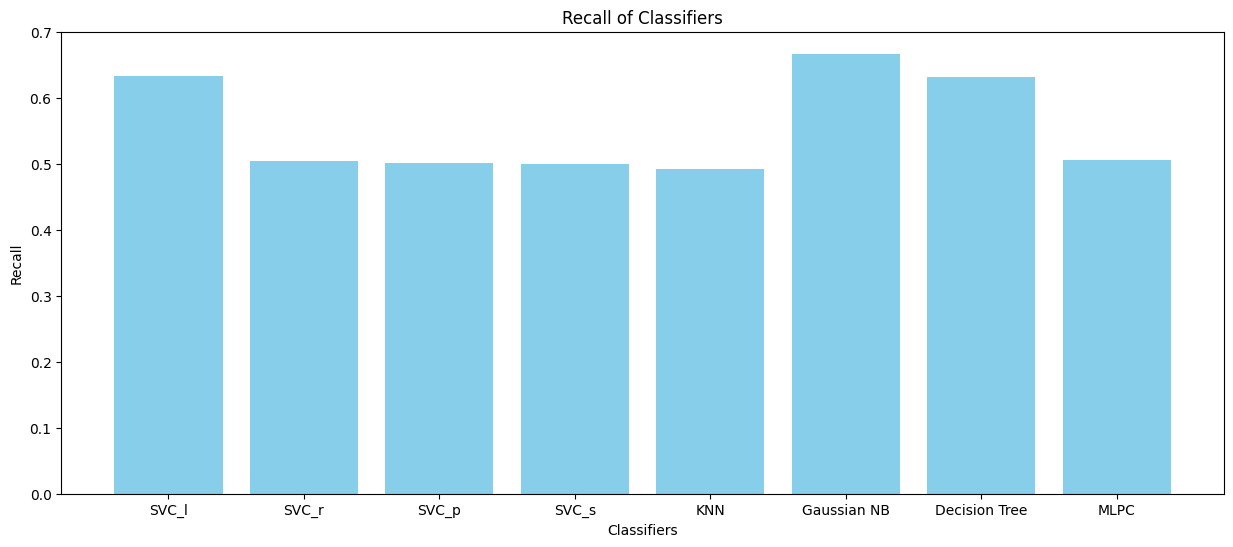

In [30]:
# Recall chart
metric = 'Recall'
classifiers = results.keys()
scores = [results[clf][metric] for clf in classifiers]

plt.figure(figsize=(15, 6))
plt.bar(classifiers, scores, color='skyblue') #['red', 'green', 'blue', 'orange', 'purple'])
plt.title(f'{metric} of Classifiers')
plt.ylabel(metric)
plt.xlabel('Classifiers')
plt.show()


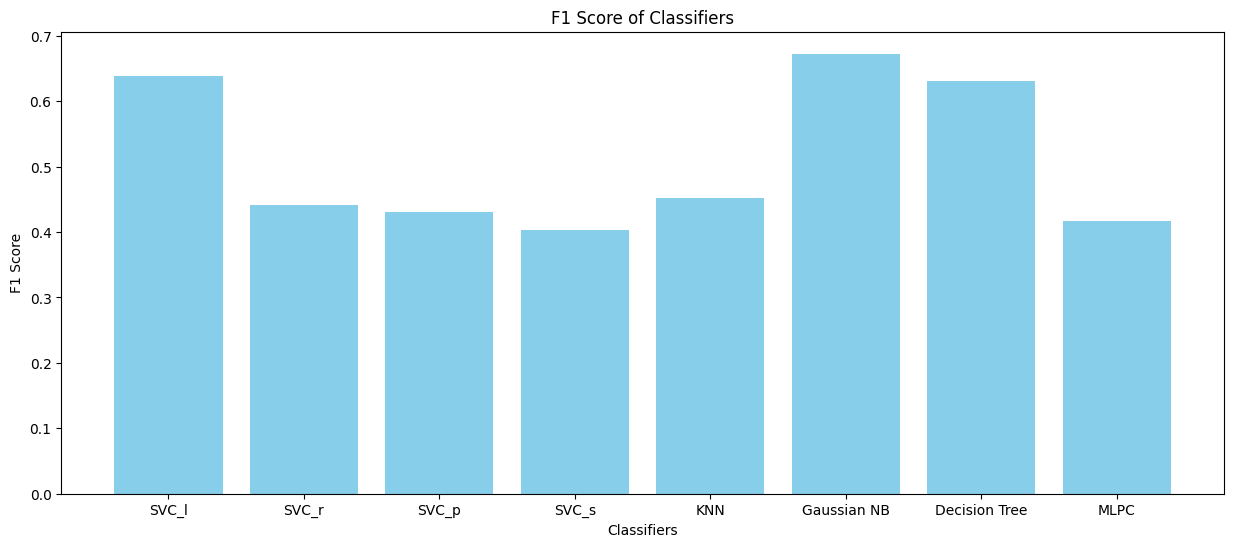

In [31]:
# F1 Score chart
metric = 'F1 Score'
classifiers = results.keys()
scores = [results[clf][metric] for clf in classifiers]

plt.figure(figsize=(15, 6))
plt.bar(classifiers, scores, color='skyblue') #['red', 'green', 'blue', 'orange', 'purple'])
plt.title(f'{metric} of Classifiers')
plt.ylabel(metric)
plt.xlabel('Classifiers')
plt.show()

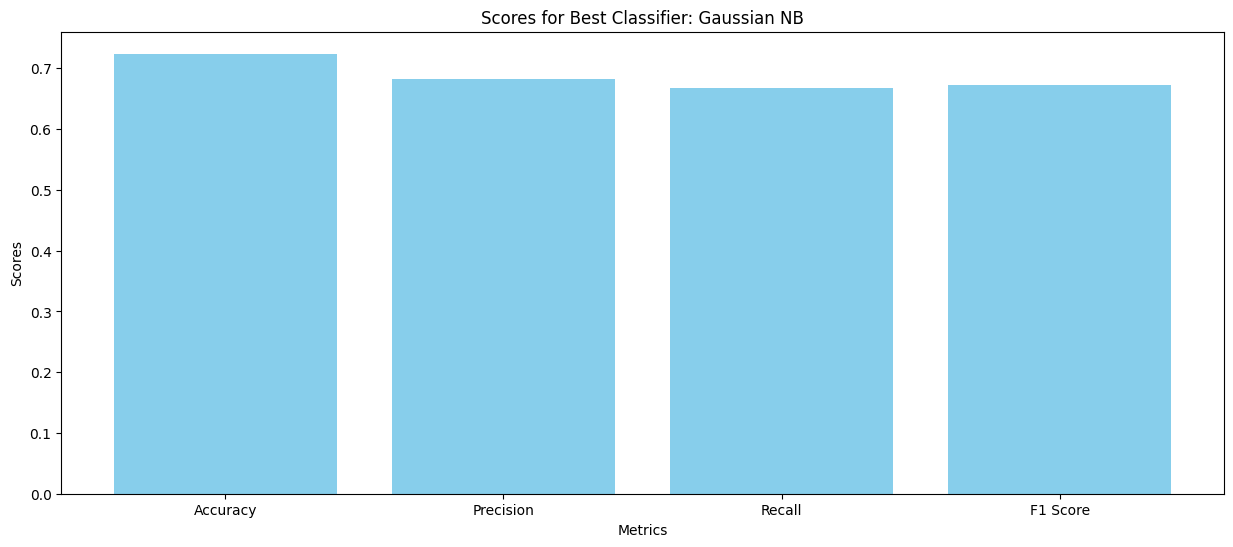

The best classifier is Gaussian NB with an average score of 0.69


In [32]:
average_scores = {name: np.mean(list(metrics.values())) for name, metrics in results.items()}
best_classifier = max(average_scores, key=average_scores.get)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

scores = results[best_classifier]

plt.figure(figsize=(15, 6))
plt.bar(metrics, [scores[metric] for metric in metrics], color='skyblue')
plt.title(f'Scores for Best Classifier: {best_classifier}')
plt.ylabel('Scores')
plt.xlabel('Metrics')

plt.show()

print(f"The best classifier is {best_classifier} with an average score of {average_scores[best_classifier]:.2f}")
